In [152]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [153]:
df1 = pd.read_excel('/Users/ved/Downloads/UpdatedFile.xlsx', sheet_name = 'Updated File')

df = df1.drop(df1.index[8]) #dropping District of Columbia
df

,Geographic Area,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,...,Other,Construction,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
0,Alabama,551479,528640,16169,270427,264883,228900,141636,236,146,...,14658,85141,-8483,1.756702,1.193265,-1.067241,-0.629276,0.344730,0.281994,0.313362
1,Alaska,-416402,-381281,6093,-426052,3557,-218533,-54953,-1816,-536,...,-5148,-104024,-3225,-3.477884,-5.872139,-2.649522,-5.754970,-3.063703,-5.813555,-4.438629
2,Arizona,442317,500699,84362,214178,143777,234796,171191,292,212,...,-4359,46187,0,-0.671344,-3.175967,0.188065,0.154615,-0.241640,-1.510676,-0.876158
3,Arkansas,169662,136099,15848,62785,91029,71560,51600,156,113,...,4909,-16479,112,-1.304849,-1.367326,1.187531,-1.969470,-0.058659,-1.668398,-0.863529
4,California,13714250,11662750,333181,8686036,4695033,5796147,4070564,967,677,...,656968,838279,19856,1.313627,0.713596,3.533787,2.743866,2.423707,1.728731,2.076219
5,Colorado,780085,906252,-17685,124816,672954,314246,304573,273,289,...,37952,162779,-481,0.708529,-0.868559,2.265463,0.668394,1.486996,-0.100083,0.693457
6,Connecticut,217203,231440,30574,-143920,330549,176809,126904,520,376,...,13827,-76415,-6948,0.187653,-0.921818,-0.510319,-0.592231,-0.161333,-0.757024,-0.459179
7,Delaware,230226,168206,892,163704,65630,95240,35553,814,304,...,-10732,35448,-917,-1.786745,-2.550457,0.475799,-2.216479,-0.655473,-2.383468,-1.519471
9,Florida,2030837,1623140,84086,685096,1261655,740342,254588,151,28,...,25384,491313,0,3.796597,3.703375,3.170368,1.083653,3.483482,2.393514,2.938498
10,Georgia,1792734,1631998,15220,901561,875953,820129,659081,390,354,...,54310,56449,-14589,2.323691,-0.068916,4.061836,-2.330572,3.192763,-1.199744,0.996509


In [154]:
df.shape

(50, 26)

In [155]:
df.describe()

,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,...,Other,Construction,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.00000,50.000000,...,50.000000,5.000000e+01,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.051656e+06,1.094226e+06,39267.620000,5.131265e+05,4.992619e+05,5.217238e+05,2.853733e+05,378.280000,204.72000,65037.180000,...,35302.840000,1.925392e+05,-3351.18000,0.067948,-1.051798,0.581801,-1.069612,0.324875,-1.060705,-0.367915
std,2.183131e+06,2.023775e+06,130094.052557,1.318447e+06,8.916317e+05,9.596179e+05,6.346961e+05,422.113151,190.60345,138853.646391,...,108607.131917,4.609647e+05,16969.50691,1.729996,2.056513,1.987611,2.177235,1.480571,1.906233,1.462963
min,-4.164020e+05,-3.812810e+05,-189902.000000,-4.260520e+05,-5.287200e+04,-2.185330e+05,-9.115900e+04,-1816.000000,-536.00000,-30556.000000,...,-109587.000000,-1.447980e+05,-68581.00000,-4.265094,-5.872139,-2.748558,-5.754970,-3.063703,-5.813555,-4.438629
25%,1.594132e+05,1.636865e+05,-2798.000000,6.725750e+04,8.445350e+04,7.785475e+04,3.634375e+04,227.000000,127.25000,10901.500000,...,1580.000000,-1.098900e+04,-6706.00000,-1.146125,-2.550219,-0.672433,-2.511457,-0.663860,-2.340944,-1.501189
50%,4.339660e+05,4.802680e+05,10656.500000,1.935750e+05,1.786925e+05,2.318480e+05,1.267460e+05,347.500000,209.00000,23297.000000,...,11836.000000,5.131800e+04,-448.00000,0.118278,-0.895188,0.332446,-1.156747,0.125395,-1.002522,-0.202292
75%,9.378575e+05,9.319605e+05,39374.500000,3.459910e+05,4.651572e+05,5.323758e+05,2.483122e+05,525.250000,305.50000,57556.000000,...,27639.250000,2.316858e+05,1616.75000,1.393509,0.515810,1.914954,0.617272,1.259884,0.236605,0.669820
max,1.371425e+07,1.166275e+07,813113.000000,8.686036e+06,4.695033e+06,5.796147e+06,4.070564e+06,1344.000000,677.00000,931123.000000,...,656968.000000,2.938326e+06,50767.00000,3.796597,3.703375,4.368536,3.455644,3.492146,2.963828,2.938498


In [156]:
X = df[["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"]].values


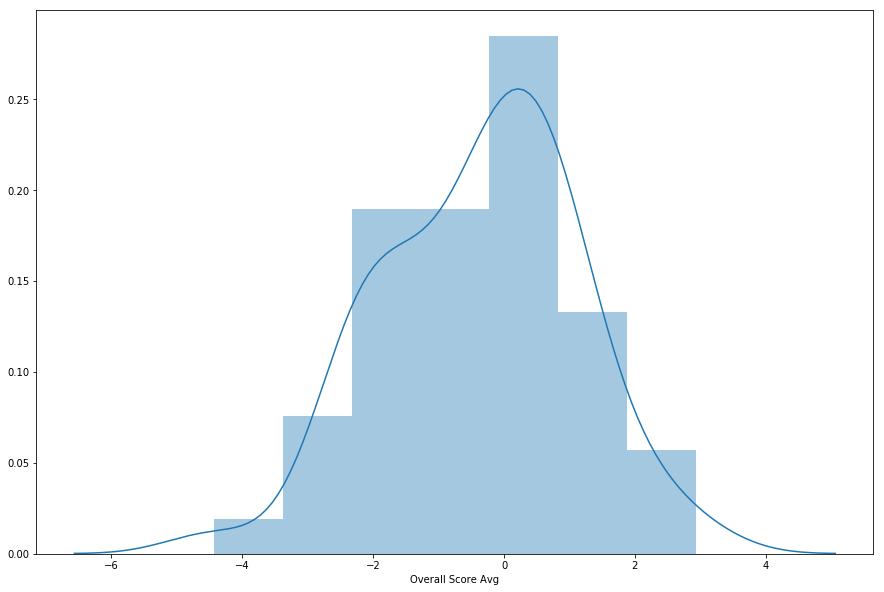

In [157]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Overall Score Avg'])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [159]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
coeff_df = pd.DataFrame(regressor.coef_, ["Total Revenue", "Federal Revenue", "State Revenue", "Local Revenue", "Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"], columns=['Coefficient'])  
coeff_df*100000 #arbitrary value to check coeffecients sizes relative to one another

,Coefficient
Total Revenue,-0.222037
Federal Revenue,0.057400
State Revenue,-0.030742
Local Revenue,-0.248694
Instructional Spending,1.141234
Support System Spending,-0.799786
Per Pupil Instructional,382.486438
Pupils,-6.980974
Instructional Staff,6.584860
General Admin,-6.774967


In [161]:
y_pred = regressor.predict(X_test)

In [162]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,252.679748,242.425741
1,262.005498,248.894915
2,258.181353,254.605251
3,259.417159,261.979531
4,263.741187,254.492173
5,242.983370,248.196238
6,248.402400,248.468487
7,254.990434,256.140947
8,249.573425,251.695234
9,250.065377,249.973903


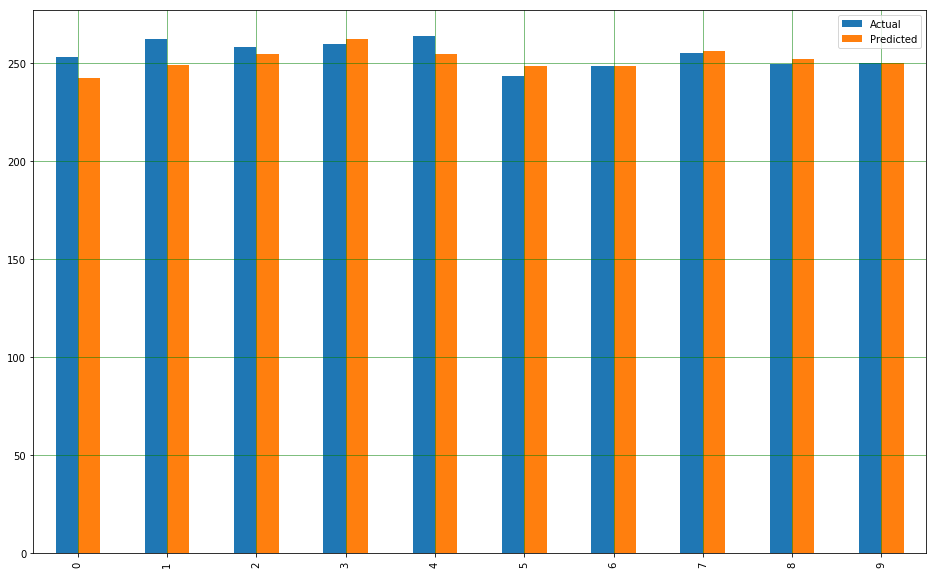

In [173]:
df2 = df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [174]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.739482770135453
Mean Squared Error: 41.49430190364585
Root Mean Squared Error: 6.441607090132543
